In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
test_dataset = h5py.File('test_catvnoncat.h5', "r")
train_dataset =h5py.File('train_catvnoncat.h5',"r")

In [3]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # train set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # train set labels

In [4]:
print("Training features:",train_set_x_orig)
print("Training labels:",train_set_y_orig)

Training features: [[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ...
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ...
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ...
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ...
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ...
   [ 91 143 201]
   [ 91 143 201]
   [ 91 143 201]]

  [[232 225 224]
   [235 234 234]
   [208 205 202]
   ...
   [ 91 144 202]
   [ 91 1

1


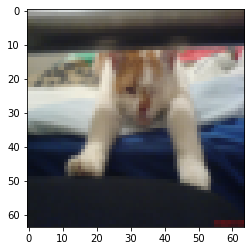

In [5]:
plt.imshow(train_set_x_orig[29])
print(train_set_y_orig[29])

In [6]:
print(train_set_x_orig.shape)
print(train_set_y_orig.shape)
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [7]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)
train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
print(train_set_y_orig.shape)
print(test_set_y_orig.shape)

(12288, 209)
(12288, 50)
(1, 209)
(1, 50)


In [8]:
def sigmoid(z):
    s=1/(np.exp(-z+1e-5)+1)
    return s

In [9]:
sigmoid(2)

0.8807960280380303

In [10]:
def initialize(dim):
    w=np.zeros([dim,1],dtype=int)
    b=0.0
    return w,b

In [11]:
w,b=initialize(13)
print(w,b)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]] 0.0


In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    cost=np.sum((Y*np.log(A+1e-5))+(1-Y)*(np.log(1-A+1e-5))) * (-1/m)
    dw=np.dot(X,(A-Y).T)/m
    db=np.mean(A-Y)
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    return grads,cost

In [13]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)
print(grads,cost)

{'dw': array([[ 0.25071689],
       [-0.06604133]]), 'db': -0.12500483811063054} 0.15899459559907697


In [14]:
def optimize(w,b,X,Y,num,rate=0.009):
    costs = []
    
    for i in range(num):
        grads,cost= propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-rate*dw
        b=b-rate*db
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num=100,rate=0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

Cost after iteration 0: 0.158995
w = [[0.80955936]
 [2.05082045]]
b = 1.5948718781091
dw = [[ 0.17860599]
 [-0.04840676]]
db = -0.08888508075234457
Costs = [array(0.1589946)]


In [16]:
def predict(w, b, X): 
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    for i in range(A.shape[1]):
        if A[0,i] >0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction

In [17]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [18]:
def model(X_train, Y_train, X_test, Y_test, num=2000, rate=0.5):
    w,b=initialize(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num, rate)
    w=params["w"]
    b=params["b"]
    Y_prediction_test=predict(w, b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    if True:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : rate,
         "num_iterations": num}
    
    return d

In [19]:
train_x=train_set_x_flatten/255
test_x=test_set_x_flatten/255

In [20]:
logistic_regression_model = model(train_x, train_set_y_orig, test_x, test_set_y_orig, num=2000,rate=0.005)

Cost after iteration 0: 0.693126
Cost after iteration 100: 0.584489
Cost after iteration 200: 0.466932
Cost after iteration 300: 0.375992
Cost after iteration 400: 0.331449
Cost after iteration 500: 0.303259
Cost after iteration 600: 0.279866
Cost after iteration 700: 0.260029
Cost after iteration 800: 0.242928
Cost after iteration 900: 0.227991
Cost after iteration 1000: 0.214807
Cost after iteration 1100: 0.203066
Cost after iteration 1200: 0.192532
Cost after iteration 1300: 0.183021
Cost after iteration 1400: 0.174386
Cost after iteration 1500: 0.166509
Cost after iteration 1600: 0.159293
Cost after iteration 1700: 0.152656
Cost after iteration 1800: 0.146531
Cost after iteration 1900: 0.140860
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


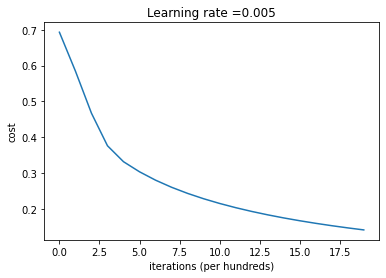

In [21]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()